In [75]:
%matplotlib inline

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## End-to-end Scikit-Learn classification workflow


The data i'll be using is [stored on GitHub](https://github.com/mrdbourke/zero-to-mastery-ml/tree/master/data). We'll start with [`heart-disease.csv`](https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv)

In [76]:

heart_disease = pd.read_csv("./Practice elements/data/heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


My goal here is to build a machine learning model on all of the columns except `target` to predict `target`.

Let's create `X` and `y` by splitting our dataframe up.

In [77]:

X = heart_disease.drop('target', axis=1)


y = heart_disease['target']

Now i've split our data into `X` and `y`, i'll use Scikit-Learn to split it into training and test sets.

In [78]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [79]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

I referred to [Scikit-Learn's machine learning map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to knwo which machine learning model to use .

After following the map, i decided to use the [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).



### 2. Preparing a machine learning model

In [80]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()



### 3. Fitting a model and making predictions

In [81]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:

y_preds = clf.predict(X_test)



### 4. Evaluating a model's predictions



In [83]:
clf.score(X_train, y_train)

1.0

In [84]:

clf.score(X_test, y_test)


0.881578947368421

## Experimenting with different classification models

I'll now try a series of different machine learning models and see which gets the best results on our dataset.

In [85]:

from sklearn.svm import LinearSVC


from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression



In [86]:
example_dict = {"RandomForestClassifier": RandomForestClassifier()}

models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

results = {}

Since each model i am  using has the same `fit()` and `score()` functions, we can loop through our models dictionary and, call `fit()` on the training data and then call `score()` with the test data.

In [87]:
example_results = {}
for model_name, model in example_dict.items():
    model.fit(X_train, y_train)
    example_results[model_name] = model.score(X_test, y_test)

example_results    

{'RandomForestClassifier': 0.8552631578947368}

In [88]:

for model_name, model in models.items(): 
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

c:\Users\user\Desktop\Supervised Learning\testenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.868421052631579,
 'KNN': 0.6842105263157895,
 'SVC': 0.7105263157894737,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.881578947368421}

In [89]:
np.random.seed(42)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

c:\Users\user\Desktop\Supervised Learning\testenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.868421052631579,
 'KNN': 0.6842105263157895,
 'SVC': 0.7105263157894737,
 'LogisticRegression': 0.881578947368421,
 'RandomForestClassifier': 0.868421052631579}

<Axes: >

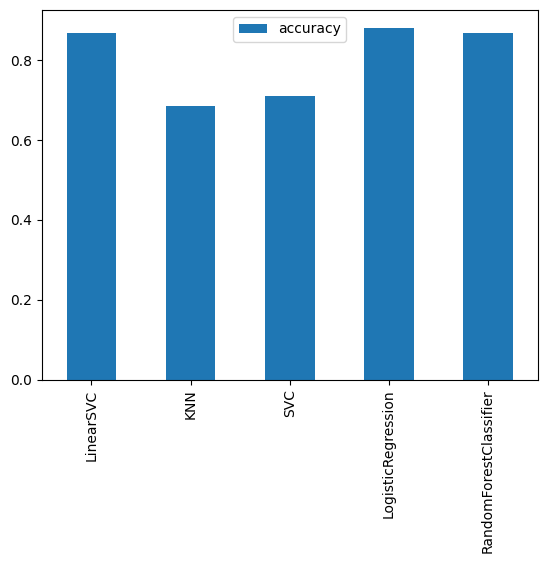

In [90]:

results_df = pd.DataFrame(results.values(), 
                          results.keys(), 
                          columns=['accuracy'])

results_df.plot.bar()

In [91]:
results_df

,accuracy
LinearSVC,0.868421
KNN,0.684211
SVC,0.710526
LogisticRegression,0.881579
RandomForestClassifier,0.868421


### Hyperparameter Tuning



In [92]:

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

Since i've got a set of hyperparameters i can import `RandomizedSearchCV`, pass it our dictionary of hyperparameters and let it search for the best combination.

In [93]:

np.random.seed(42)


from sklearn.model_selection import RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [94]:
# Find the best parameters of the RandomizedSearchCV instance using the best_params_ attribute
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [95]:
# Score the instance of RandomizedSearchCV using the test data
rs_log_reg.score(X_test, y_test)

0.881578947368421

### Classifier Model Evaluation

I'll instantiate a new instance of our model using the best hyerparameters found by `RandomizedSearchCV`. 

In [96]:
# Instantiate a LogisticRegression classifier using the best hyperparameters from RandomizedSearchCV
clf = LogisticRegression(**rs_log_reg.best_params_)

clf.fit(X_train, y_train)

LogisticRegression(C=np.float64(0.23357214690901212), solver='liblinear')

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay



Let's make some predictions on the test data using our latest model and save them to `y_preds`.

In [98]:

y_preds = clf.predict(X_test)

Time to use the predictions our model has made to evaluate it beyond accuracy.

In [99]:
confusion_matrix(y_test, y_preds)

array([[23,  8],
       [ 1, 44]])

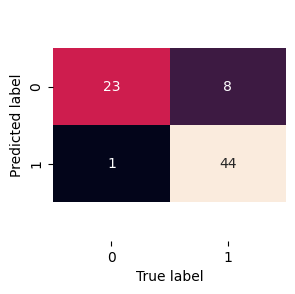

In [100]:
# Create a more visual confusion matrix

import seaborn as sns 

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [101]:
# Create a classification report using the classification_report function

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.85      0.98      0.91        45

    accuracy                           0.88        76
   macro avg       0.90      0.86      0.87        76
weighted avg       0.89      0.88      0.88        76



In [102]:

precision_score(y_test, y_preds)

np.float64(0.8461538461538461)

In [103]:

recall_score(y_test, y_preds)

np.float64(0.9777777777777777)

In [104]:

f1_score(y_test, y_preds)

np.float64(0.9072164948453608)

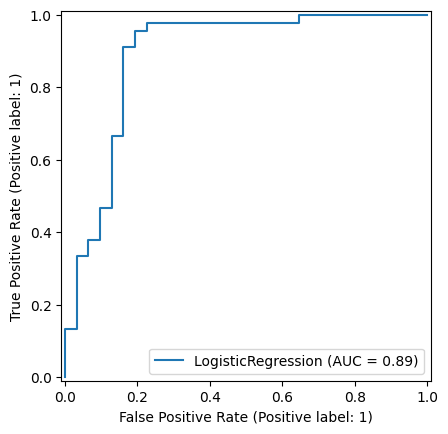

In [105]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
cross_val_score(clf, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [108]:

cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

np.float64(0.8479781420765027)

In [109]:
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

np.float64(0.8215873015873015)

In [110]:
cross_val_recall = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

np.float64(0.9272727272727274)

In [111]:
cross_val_f1 = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

np.float64(0.8705403543192143)

### Exporting and importing a trained model


In [112]:


from joblib import load, dump

In [113]:

dump(clf, 'clf_model.joblib')

['clf_model.joblib']

In [114]:

loaded_model = load('clf_model.joblib')


print(clf.score(X_test, y_test))
print(loaded_model.score(X_test, y_test))


0.881578947368421
0.881578947368421




## Scikit-Learn Regression 

In [115]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv")


car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [116]:

car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [117]:

car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [118]:

car_sales.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [119]:

car_sales.dropna(subset=["Price"], inplace=True)

In [120]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           903 non-null    object 
 1   Colour         904 non-null    object 
 2   Odometer (KM)  902 non-null    float64
 3   Doors          903 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 44.5+ KB


### Building a pipeline


In [121]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [122]:
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

In [123]:
door_feature = ["Doors"]

door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

In [124]:
numeric_features = ["Odometer (KM)"]

# Crearte numeric transformer Pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))])

In [125]:
# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

In [126]:
from sklearn.linear_model import Ridge

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

In [127]:
regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel='linear'),
                     "SVR_rbf": SVR(kernel='rbf'),
                     "RandomForestRegressor": RandomForestRegressor()}


regression_results = {}

In [128]:
car_sales_X = car_sales.drop("Price", axis=1)

car_sales_y = car_sales["Price"]

In [129]:

car_X_train, car_X_test, car_y_train, car_y_test = train_test_split(car_sales_X,
                                                                    car_sales_y,
                                                                    test_size=0.2,
                                                                    random_state=42)

car_X_train.shape, car_X_test.shape, car_y_train.shape, car_y_test.shape

((760, 4), (190, 4), (760,), (190,))

In [130]:
for model_name, model in regression_models.items():
    
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                      ("model", model)])
    
    print(f"Fitting {model_name}...")
    model_pipeline.fit(car_X_train, car_y_train)
    
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(car_X_test, 
                                                          car_y_test)

Fitting Ridge...
Scoring Ridge...
Fitting SVR_linear...
Scoring SVR_linear...
Fitting SVR_rbf...
Scoring SVR_rbf...
Fitting RandomForestRegressor...
Scoring RandomForestRegressor...


In [131]:

regression_results

{'Ridge': 0.2540261105794389,
 'SVR_linear': -0.489452821008145,
 'SVR_rbf': 0.0018546241516633755,
 'RandomForestRegressor': 0.2291358152962253}

In [132]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [133]:
ridge_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                                 ("model", Ridge())])

ridge_pipeline.fit(car_X_train, car_y_train)

car_y_preds = ridge_pipeline.predict(car_X_test)

car_y_preds[:50]
###

array([18514.480873  , 22204.86580267, 11045.72092225,  6891.87687957,
        8793.93970278, 10926.96786577, 15267.76229871, 13834.80312146,
       20207.44377898, 14412.59968701,  6216.01228306, 16543.06707068,
       11783.69374936, 13492.13284255, 14321.17899086, 16425.45131776,
       15999.88230172,  9925.04252351, 11576.64865889, 11580.55130633,
       10647.22402588, 13113.54464064, 17874.90033257, 23447.29246732,
       11797.33019118, 14481.85336505, 18430.527126  , 14680.33044208,
       20585.63901269, 19953.91395769, 18163.1170151 , 22366.43390174,
       12435.69707467, 14265.25495748, 18351.62656383, 19564.58267503,
       12213.05747919, 12479.20772529, 18677.93478691, 11284.89072638,
       15278.54001605, 17378.81425165, 19247.77623181, 17343.90692672,
       15048.12797569, 12724.44477165, 12389.86021752,  8475.63778401,
       15255.49324105, 18602.79970861])

In [137]:
mse = mean_squared_error(car_y_test, car_y_preds)
mse

np.float64(49950182.63337459)

In [135]:
mae =  mean_absolute_error(car_y_test, car_y_preds)
mae

np.float64(5713.821520855156)

In [136]:
r2 = r2_score(car_y_test, car_y_preds)
r2

0.2540261105794389